# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [1]:
# !kaggle datasets download -d khaledzsa/parkinglot-occupation
# !unzip parkinglot-occupation.zip

## Import Libraries

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Rescaling,Flatten

from tensorflow.keras.preprocessing import image_dataset_from_directory

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [3]:
# Resizing and splitting happened here
# Rescaling would be in the model

img_width, img_height = 64,64

train = image_dataset_from_directory(
    'ParkingLot_Occupation/train',
    label_mode='binary',
    image_size=(img_width, img_height),
    shuffle=True,
    seed=123,
    validation_split=0.15,
    subset='training',
    batch_size=32
)

val = image_dataset_from_directory(
    'ParkingLot_Occupation/train',
    label_mode='binary',
    image_size=(img_width, img_height),
    shuffle=True,
    seed=123,
    validation_split=0.15,
    subset='validation',
    batch_size=32
)

test = image_dataset_from_directory(
    'ParkingLot_Occupation/test',
    label_mode='binary',
    image_size=(img_width, img_height),
    shuffle=True,
    seed=123,
    batch_size=32
)

Found 1382 files belonging to 2 classes.
Using 1175 files for training.
Found 1382 files belonging to 2 classes.
Using 207 files for validation.
Found 344 files belonging to 2 classes.


## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [4]:
# Already happened previous step

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [5]:
model = Sequential()

# Creating the Rescaling here
model.add(Rescaling([1./255.0]))


# Hidden layers
# Conv2D layers
model.add(Conv2D(4,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(6,(3,3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(8,(3,3),activation='relu'))
model.add(MaxPooling2D())

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(units=12,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=28,activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(units=1,activation='sigmoid'))

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [7]:
history = model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.5355 - loss: 0.6855 - val_accuracy: 0.4541 - val_loss: 0.6471
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6424 - loss: 0.6429 - val_accuracy: 0.9179 - val_loss: 0.4946
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8847 - loss: 0.4908 - val_accuracy: 0.9324 - val_loss: 0.4067
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9179 - loss: 0.3963 - val_accuracy: 0.9710 - val_loss: 0.3123
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.9430 - loss: 0.3371 - val_accuracy: 0.9807 - val_loss: 0.2470
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9338 - loss: 0.3020 - val_accuracy: 0.9662 - val_loss: 0.1952
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9415 - loss: 0.2381 - val_accuracy: 0.9710 - val_loss: 0.1396
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9468 - loss: 0.1998 - val_accuracy: 0.9807 - 

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [30]:
model.evaluate(test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9771 - loss: 0.0520


[0.04688907787203789, 0.9825581312179565]

## Make Predictions
Use the trained model to make predictions on new or unseen parkinglot images.

In [36]:
# didn't work and the result is low

# import numpy as np
# from sklearn.metrics import accuracy_score

# y_pred = model.predict(train) >= 0.5

# y_true = [y for x,y in train]

# print((accuracy_score(y_pred,np.concatenate(y_true)))*100)

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [9]:
# !kaggle datasets download -d khaledzsa/parkinglot-occupation
# !unzip parkinglot-occupation.zip

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

<Axes: >

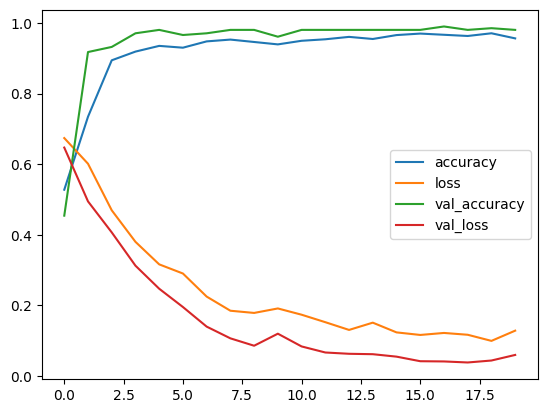

In [10]:
import pandas as pd
pd.DataFrame(history.history).plot()

## Save the Model
Save the trained CNN model for submission.

In [11]:
model.save('CNN_model.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying parkinglot?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

## Project Questions:

1. **Data Preprocessing**: Resizing the image by 64x64 becuase I don't want the model to take too much time. For normalization I used rescaling the picture to 0-255 to get the color rgb and to make it around 0-1. For augmentation, we could use it in general but no need for right now becuase there are 1500 picture and that would be kind of enough. but if we want more accuracy and more robustness in the model we could use data augmentation using CV2 => opencv

2. **Model Architecture**: I built 6 hidden layers, 3 for Convolution adding maxpooling to each layer, and 3 other layers to make it fully connected and learn from the data as fast as it can. the number of layers would be random with the units for each layer. Adding drop = 0.5 just becuase I don't want the model to take too much time.

3. **Activation Functions**: I used relu for every layer except the output I used sigmoid. relu becuase there should be no negative values in any of the pixels and all of them should be positive. in output it should be sigmoid because the result prediction should be either occupied or empty which is a job for binary which is the activation function sigmoid is better than softmax due to just 2 predicted values

4. **Training Process**: Batch size would be the default which is 32, but with epochs i used 20 epochs because when I used 100 it went to overfitting the training data, and I don't want to add early stop to the code. optimizers would be ADAM because it combine all the optimizer advantages together and make it prefect as optimizer. The model went well from the start until the end and it reached the best weight in faster way.

5. **Loss Function and Metrics**: loss function would be binary crossentropy because there are only 2 prediction values, and the metrics would be accuracy becuase in prediction classes the prection is balanced. using these two would result in the best calculating the prediction in the future.

6. **Regularization Techniques**: I used dropiut and maxpooling layers, both of them make the running of the model fitting faster than before, and didn't lose any accuracy in the way. I used them because of time consuming wihtout them even though my model is not complex but without them it took 10 mins just to run the fitting and I wanted to test more hyper parameters in the dataset

7. **Model Evaluation**: Using evaluation, it's like predicting the values of the test then compare it with the real value of the test but in just one command. it would be better than typing multiple lines especially that I have a prefetchdataset which means getting the true labels would require a few lines. it's the best technique because as I said before accuracy would be the best metrics which make the evaluate the best evaluation technique

8. **Model Visualization**: It would result in if the model is overfitted or underfitted or will it going to the overfit or underfit. this way you can read the graph to get more insights about that. and if went to overfit it could make you add more regulirazation techniques to make the model performance better.

9. **Overfitting and Underfitting**: I didn't find any overfitting or underfitting because I used regularization techniques which was Maxpooling and Dropout